In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Load the full stats dataset
full_data = pd.read_csv("nba_merged_data.csv")  # Update with your actual filename

In [27]:
unique_season_team = full_data[full_data['PLAYOFF_WINS'] == 16][['SEASON_YEAR', 'TEAM_NAME']].drop_duplicates()
print(unique_season_team)

      SEASON_YEAR              TEAM_NAME
82        2023-24         Boston Celtics
3034      2022-23         Denver Nuggets
5658      2021-22  Golden State Warriors
8532      2020-21        Milwaukee Bucks
10442     2019-20     Los Angeles Lakers
13872     2018-19        Toronto Raptors
14856     2017-18  Golden State Warriors
17316     2016-17  Golden State Warriors
19448     2015-16    Cleveland Cavaliers
22236     2014-15  Golden State Warriors


In [13]:
print(full_data.columns)

Index(['SEASON_YEAR', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK',
       'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK',
       'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK',
       'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK',
       'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'AVAILABLE_FLAG',
       'E_OFF_RATING', 'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING',
       'E_NET_RATING', 'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE', 'OFF_RATING_RANK',
       'DEF_RATING_RANK',

In [14]:
# Update the 'Type' column for playoff teams based on PLAYOFF_WINS
def categorize_playoff_type(wins):
    if wins == 0:
        return "Non-Playoff"
    elif 1 <= wins <= 3:
        return "First-Round"
    elif 4 <= wins <= 7:
        return "Second-Round"
    elif 8 <= wins <= 11:
        return "Conference-Finals"
    elif 12 <= wins <= 15:
        return "Finals"
    elif wins == 16:
        return "Champions"
    return "Playoff"

playoffs = full_data.copy()

# Add a column to indicate team type
playoffs['Type'] = playoffs['PLAYOFF_WINS'].apply(categorize_playoff_type)

playoffs = playoffs.loc[:, ~playoffs.columns.str.endswith('RANK')]

playoffs

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS,Type
0,2023-24,1610612737,ATL,Atlanta Hawks,22301188,2024-04-14T00:00:00,ATL @ IND,L,48.0,39,...,0.159,0.506,0.570,108.6,107.00,89.17,107,0.351,0,Non-Playoff
1,2023-24,1610612737,ATL,Atlanta Hawks,22301178,2024-04-12T00:00:00,ATL @ MIN,L,48.0,40,...,0.149,0.494,0.525,102.9,102.00,85.00,101,0.394,0,Non-Playoff
2,2023-24,1610612737,ATL,Atlanta Hawks,22301159,2024-04-10T00:00:00,ATL vs. CHA,L,48.0,43,...,0.184,0.634,0.640,98.9,98.00,81.67,98,0.495,0,Non-Playoff
3,2023-24,1610612737,ATL,Atlanta Hawks,22301147,2024-04-09T00:00:00,ATL vs. MIA,L,58.0,45,...,0.145,0.442,0.466,94.5,91.86,76.55,110,0.453,0,Non-Playoff
4,2023-24,1610612737,ATL,Atlanta Hawks,22301130,2024-04-06T00:00:00,ATL @ DEN,L,48.0,37,...,0.152,0.494,0.551,105.4,105.00,87.50,105,0.366,0,Non-Playoff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23953,2014-15,1610612764,WAS,Washington Wizards,21400063,2014-11-05T00:00:00,WAS vs. IND,W,53.0,34,...,0.118,0.412,0.475,95.1,91.92,76.60,102,0.529,6,Second-Round
23954,2014-15,1610612764,WAS,Washington Wizards,21400051,2014-11-04T00:00:00,WAS @ NYK,W,48.0,39,...,0.135,0.538,0.555,91.4,88.50,73.75,89,0.651,6,Second-Round
23955,2014-15,1610612764,WAS,Washington Wizards,21400031,2014-11-01T00:00:00,WAS vs. MIL,W,48.0,40,...,0.190,0.575,0.617,101.5,99.50,82.92,100,0.655,6,Second-Round
23956,2014-15,1610612764,WAS,Washington Wizards,21400016,2014-10-30T00:00:00,WAS @ ORL,W,48.0,39,...,0.126,0.531,0.574,97.5,95.00,79.17,95,0.547,6,Second-Round


In [15]:
colors = {
    'Non-Playoff': 'lightcoral',
    'First-Round': 'coral',
    'Second-Round': 'darkorange',
    'Conference-Finals': 'orange',
    'Finals': 'orangered',
    'Champions': 'red'
}

# Define the order for the 'Type' column
type_order = ['Non-Playoff', 'First-Round', 'Second-Round', 'Conference-Finals', 'Finals', 'Champions']

numeric_columns = playoffs.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
# Create box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=playoffs, x='Type', y=f'{column}', palette=colors, order=type_order)
    plt.title(f'Box Plot of {column}', fontsize=16)
    plt.ylabel(column, fontsize=12)
    plt.show()

In [ ]:
# Calculate the average of numeric columns for each 'Type'
averages = playoffs.groupby('Type')[numeric_columns].mean()

# Reindex the averages to match the order in type_order
averages = averages.reindex(type_order)

# Create bar plots for all numeric columns grouped by 'Type'
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    averages[column].plot(kind='bar', color=[colors.get(t, 'gray') for t in type_order])
    plt.title(f'Average {column} by Type', fontsize=16)
    plt.xlabel('Type', fontsize=12)
    plt.ylabel(f'Average {column}', fontsize=12)
    plt.xticks(ticks=range(len(type_order)), labels=type_order, rotation=45)
    plt.show()

In [28]:
champions = full_data[full_data['PLAYOFF_WINS'] == 16].drop_duplicates()
champions

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,PLAYOFF_WINS
82,2023-24,1610612738,BOS,Boston Celtics,22301186,2024-04-14T00:00:00,BOS vs. WAS,W,48.0,51,...,40,45,37,28,74,10,14,5,36,16
83,2023-24,1610612738,BOS,Boston Celtics,22301173,2024-04-12T00:00:00,BOS vs. CHA,W,48.0,54,...,14,15,1,7,3,35,48,20,6,16
84,2023-24,1610612738,BOS,Boston Celtics,22301167,2024-04-11T00:00:00,BOS vs. NYK,L,48.0,40,...,45,69,81,82,44,54,57,55,72,16
85,2023-24,1610612738,BOS,Boston Celtics,22301148,2024-04-09T00:00:00,BOS @ MIL,L,48.0,37,...,32,45,59,71,51,76,81,78,80,16
86,2023-24,1610612738,BOS,Boston Celtics,22301134,2024-04-07T00:00:00,BOS vs. POR,W,48.0,49,...,3,76,77,76,48,12,15,22,21,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22313,2014-15,1610612744,GSW,Golden State Warriors,21400087,2014-11-08T00:00:00,GSW @ HOU,W,48.0,39,...,75,3,51,6,81,62,67,19,20,16
22314,2014-15,1610612744,GSW,Golden State Warriors,21400068,2014-11-05T00:00:00,GSW vs. LAC,W,48.0,43,...,24,74,1,2,80,1,1,15,45,16
22315,2014-15,1610612744,GSW,Golden State Warriors,21400042,2014-11-02T00:00:00,GSW @ POR,W,48.0,36,...,67,75,70,79,66,70,64,39,52,16
22316,2014-15,1610612744,GSW,Golden State Warriors,21400038,2014-11-01T00:00:00,GSW vs. LAL,W,48.0,46,...,35,5,66,19,73,7,6,12,6,16


In [29]:
grouped_data = champions.groupby('SEASON_YEAR').mean()
grouped_data

C:\Users\schei\AppData\Local\Temp\ipykernel_8584\673071901.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = champions.groupby('SEASON_YEAR').mean()


,TEAM_ID,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,PLAYOFF_WINS
SEASON_YEAR,,,,,,,,,,,,,,,,,,,,,
2014-15,1.610613e+09,2.140064e+07,48.121951,41.585366,87.036585,0.479232,10.768293,27.036585,0.397878,16.012195,...,41.353659,41.243902,41.219512,41.353659,41.317073,41.451220,41.487805,39.963415,41.475610,16.0
2015-16,1.610613e+09,2.150063e+07,48.426829,38.670732,84.000000,0.461951,10.731707,29.609756,0.362451,16.256098,...,41.402439,41.329268,41.317073,41.329268,41.390244,41.390244,41.500000,40.292683,41.500000,16.0
2016-17,1.610613e+09,2.160062e+07,48.243902,43.073171,87.073171,0.495963,11.975610,31.243902,0.385951,17.768293,...,41.402439,41.146341,41.329268,41.329268,41.170732,41.426829,41.500000,40.243902,41.500000,16.0
2017-18,1.610613e+09,2.170061e+07,48.121951,42.792683,85.109756,0.503524,11.292683,28.890244,0.388805,16.585366,...,41.426829,41.268293,41.158537,41.402439,41.207317,41.475610,41.500000,40.378049,41.500000,16.0
2018-19,1.610613e+09,2.180060e+07,48.487805,42.195122,89.085366,0.475878,12.378049,33.792683,0.365183,17.670732,...,41.426829,41.304878,41.329268,41.280488,41.317073,41.378049,41.500000,40.268293,41.487805,16.0
2019-20,1.610613e+09,2.190057e+07,48.140845,42.338028,88.295775,0.479113,11.014085,31.577465,0.347704,17.746479,...,35.915493,35.774648,35.887324,35.774648,35.774648,35.971831,36.000000,35.028169,36.000000,16.0
2020-21,1.610613e+09,2.200055e+07,48.138889,44.736111,91.805556,0.488014,14.416667,37.069444,0.385819,16.236111,...,36.375000,36.222222,36.347222,36.388889,36.305556,36.472222,36.500000,35.416667,36.486111,16.0
2021-22,1.610613e+09,2.210062e+07,48.121951,40.524390,86.426829,0.469183,14.341463,39.402439,0.364524,15.609756,...,41.304878,41.134146,41.256098,41.414634,41.195122,41.439024,41.500000,40.121951,41.487805,16.0
2022-23,1.610613e+09,2.220062e+07,48.182927,43.585366,86.439024,0.505366,11.817073,31.207317,0.376012,16.804878,...,41.426829,41.207317,41.304878,41.378049,41.280488,41.463415,41.500000,40.341463,41.500000,16.0


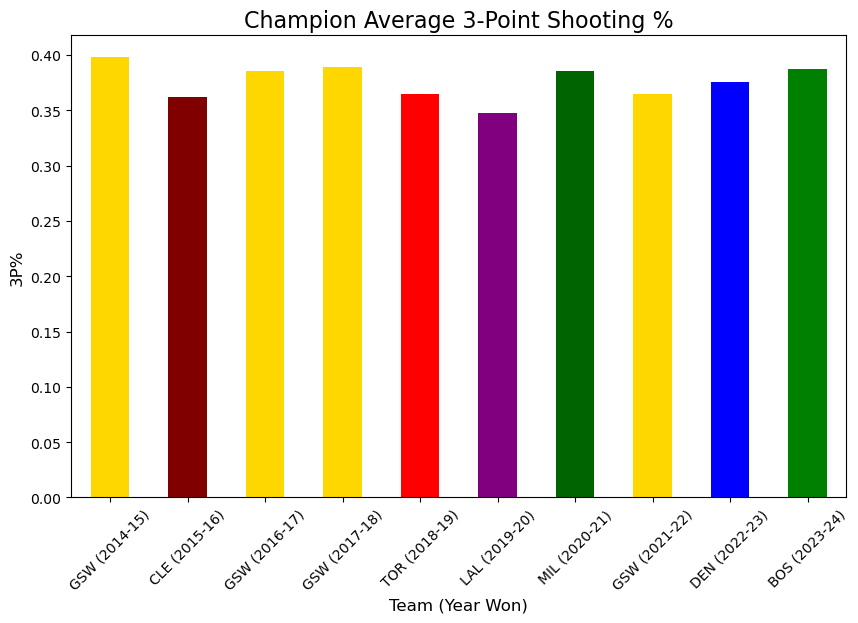

In [44]:
# Map colors to each team based on TEAM_ABBREVIATION
team_colors = {'BOS': 'green', 'CLE': 'maroon', 'DEN': 'blue', 'GSW': 'gold', 'LAL': 'purple', 
               'MIL': 'darkgreen', 'TOR': 'red'}

# Get the colors for the bars
bar_colors = team_abbrevs['TEAM_ABBREVIATION'].map(team_colors)

team_abbrevs = full_data[full_data['PLAYOFF_WINS'] == 16][['SEASON_YEAR', 'TEAM_ABBREVIATION']].drop_duplicates()
team_abbrevs['Label'] = team_abbrevs['TEAM_ABBREVIATION'] + ' (' + team_abbrevs['SEASON_YEAR'] + ')'

plt.figure(figsize=(10, 6))
grouped_data['FG3_PCT'].plot(kind='bar', color=bar_colors[::-1])
plt.title('Champion Average 3-Point Shooting %', fontsize=16)
plt.xlabel('Team (Year Won)', fontsize=12)
plt.ylabel('3P%', fontsize=12)
plt.xticks(ticks=range(len(team_abbrevs['SEASON_YEAR'])), labels=team_abbrevs['Label'][::-1], rotation=45)
plt.show()